# **Caso de estudio 5.** Hierarchical Time Series

## **Objetivos:**

- **Pronóstico de la Cartera de Crédito:**
Realizar la predicción de la cartera de crédito para los próximos 30 periodos (que pueden ser meses, trimestres, etc.) de las 5 instituciones bancarias más grandes de México.

- **Pronóstico de la Distribución de Activos:**
Utilizar la información del enlace de Banxico para predecir la distribución de activos según distintos tipos de crédito.

- **Cálculo de Participación de Mercado:**
En ambos casos, se debe calcular la participación de cada institución o categoría dividiendo el pronóstico individual entre el total agregado.

- **Comparación de Métodos:** Realizar dos tipos de pronósticos:
    - Pronóstico Tradicional: Cada serie se modela de forma independiente sin considerar la relación jerárquica.
    - Pronóstico Jerárquico: Se incorpora la estructura de agregación (por ejemplo, los datos individuales se suman para obtener el total) y se realizan pronósticos que aseguren coherencia entre niveles.

El archivo contiene las siguientes columnas:

- **Fecha:** Representa los periodos de tiempo.
- **Banco:** Identifica la institución bancaria (incluye "Sistema Bancario" como total del mercado).
- **Crédito:** Monto de créditos otorgados.
- **Consumo:** Monto de créditos de consumo.
- **Vivienda:** Monto de créditos de vivienda.


In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [4]:
# Cargar datos
file_path = "Info_créditos_bancos.csv"  # Ajusta la ruta si es necesario

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    print(f"Error: No se encuentra el archivo {file_path}")
    
df.head()


,Fecha,Credito_SistemaBancario,Consumo_SistemaBancario,Vivienda_SistemaBancario,Credito_BBVA,Consumo_BBVA,Vivienda_BBVA,Credito_Santander,Consumo_Santander,Vivienda_Santander,Credito_banorte,Consumo_banorte,Vivienda_banorte,Credito_banamex,Consumo_banamex,Vivienda_banamex,Credito_HSBC,Consumo_HSBC,Vivienda_HSBC
0,01/01/2022,5606300,1379240,1302162,1334279,415122,329198,764704,177653,219278,821738,171771,250953,551687,193632,69236,392538,98881,141092
1,01/02/2022,5622316,1601869,1396540,1336382,475451,357795,763349,194633,233647,824204,193056,267104,554041,214315,71639,395569,105928,151547
2,01/03/2022,5677221,1618451,1406113,1362370,480562,359991,770440,196209,235577,821472,195971,268808,560663,215811,72803,392305,106312,152027
3,01/04/2022,5767031,1431934,1331484,1378537,433163,337516,782054,180387,223922,833368,175493,255315,570510,203013,68858,398891,102264,146116
4,01/05/2022,5825719,1697337,1424642,1408410,501924,366731,784134,205749,238532,836021,203460,272886,565689,232963,74356,401918,109821,152827


In [5]:
# Convertir fecha a formato datetime
df["Fecha"] = pd.to_datetime(df["Fecha"], format="%d/%m/%Y")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Fecha                     37 non-null     datetime64[ns]
 1   Credito_SistemaBancario   37 non-null     int64         
 2   Consumo_SistemaBancario   37 non-null     int64         
 3   Vivienda_SistemaBancario  37 non-null     int64         
 4   Credito_BBVA              37 non-null     int64         
 5   Consumo_BBVA              37 non-null     int64         
 6   Vivienda_BBVA             37 non-null     int64         
 7   Credito_Santander         37 non-null     int64         
 8   Consumo_Santander         37 non-null     int64         
 9   Vivienda_Santander        37 non-null     int64         
 10  Credito_banorte           37 non-null     int64         
 11  Consumo_banorte           37 non-null     int64         
 12  Vivienda_banorte        

In [6]:
# Definir bancos a considerar
bancos = ["BBVA", "Santander", "banorte", "banamex", "HSBC"]


In [7]:
# Identificar las columnas de cada tipo de crédito
credit_cols = [f"Credito_{banco}" for banco in bancos]
consumo_cols = [f"Consumo_{banco}" for banco in bancos]
vivienda_cols = [f"Vivienda_{banco}" for banco in bancos]


## **Participación de mercado**

In [9]:
# Crear un nuevo DataFrame con los resultados de la participación de mercado
df_participacion = pd.DataFrame()

# Calcular la participación de mercado
for col in credit_cols:
    df_participacion[f"Participacion_{col}"] = df[col] / df["Credito_SistemaBancario"]

for col in consumo_cols:
    df_participacion[f"Participacion_{col}"] = df[col] / df["Consumo_SistemaBancario"]

for col in vivienda_cols:
    df_participacion[f"Participacion_{col}"] = df[col] / df["Vivienda_SistemaBancario"]


In [10]:
# Crear un nuevo DataFrame con los resultados de la participación de mercado
df_participacion["Fecha"] = df["Fecha"]
df_participacion.head()


,Participacion_Credito_BBVA,Participacion_Credito_Santander,Participacion_Credito_banorte,Participacion_Credito_banamex,Participacion_Credito_HSBC,Participacion_Consumo_BBVA,Participacion_Consumo_Santander,Participacion_Consumo_banorte,Participacion_Consumo_banamex,Participacion_Consumo_HSBC,Participacion_Vivienda_BBVA,Participacion_Vivienda_Santander,Participacion_Vivienda_banorte,Participacion_Vivienda_banamex,Participacion_Vivienda_HSBC,Fecha
0,0.237996,0.136401,0.146574,0.098405,0.070017,0.300979,0.128805,0.124540,0.140390,0.071692,0.252809,0.168395,0.192720,0.053170,0.108352,2022-01-01
1,0.237692,0.135771,0.146595,0.098543,0.070357,0.296810,0.121504,0.120519,0.133791,0.066128,0.256201,0.167304,0.191261,0.051297,0.108516,2022-02-01
2,0.239971,0.135707,0.144696,0.098757,0.069102,0.296927,0.121233,0.121086,0.133344,0.065687,0.256019,0.167538,0.191171,0.051776,0.108119,2022-03-01
3,0.239038,0.135608,0.144506,0.098926,0.069167,0.302502,0.125974,0.122557,0.141775,0.071417,0.253489,0.168175,0.191752,0.051715,0.109739,2022-04-01
4,0.241757,0.134599,0.143505,0.097102,0.068990,0.295713,0.121219,0.119870,0.137252,0.064702,0.257420,0.167433,0.191547,0.052193,0.107274,2022-05-01


## **Pronósticos**

### **Pronóstico tradicional**

In [13]:
# Definir horizonte de pronóstico
horizon = 30


In [14]:
# Generar pronósticos individuales con ARIMA
df_forecasts = pd.DataFrame()
fechas_futuras = pd.date_range(start=df["Fecha"].iloc[-1], periods=horizon+1, freq='M')[1:]

for category in ["Credito_SistemaBancario", "Consumo_SistemaBancario", 
                 "Vivienda_SistemaBancario"] + credit_cols + consumo_cols + vivienda_cols:
    model = ARIMA(df[category], order=(1,1,1))  
    fit = model.fit()
    df_forecasts[category] = fit.forecast(horizon)
   

/var/folders/ct/cf8v_6td4sjd6_m0d5bnd1mc0000gn/T/ipykernel_14815/2079288491.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas_futuras = pd.date_range(start=df["Fecha"].iloc[-1], periods=horizon+1, freq='M')[1:]
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/sta

In [15]:
df_forecasts.head()

,Credito_SistemaBancario,Consumo_SistemaBancario,Vivienda_SistemaBancario,Credito_BBVA,Credito_Santander,Credito_banorte,Credito_banamex,Credito_HSBC,Consumo_BBVA,Consumo_Santander,Consumo_banorte,Consumo_banamex,Consumo_HSBC,Vivienda_BBVA,Vivienda_Santander,Vivienda_banorte,Vivienda_banamex,Vivienda_HSBC
37,7.716146e+06,1.238145e+06,1.432367e+06,1.960582e+06,891549.719826,1.146301e+06,461999.007638,514308.518726,371996.893116,152278.553360,153097.210384,178515.472986,87431.159727,368955.161313,240192.545340,270239.440059,75912.180445,152361.099384
38,7.772857e+06,1.236888e+06,1.432369e+06,1.977413e+06,891528.961995,1.155141e+06,461365.981667,517570.881269,371678.478628,151854.834595,153698.584142,178350.154322,87222.245875,368961.449146,240200.922919,274788.338968,75914.252895,152889.171782
39,7.829565e+06,1.236539e+06,1.432369e+06,1.994242e+06,891532.818853,1.163982e+06,460813.256010,520833.087634,371599.337857,151760.413017,154058.359968,178330.139880,87174.064094,368962.344428,240202.284514,270240.100995,75914.362517,152564.877960
40,7.886270e+06,1.236442e+06,1.432369e+06,2.011071e+06,891532.102239,1.172822e+06,460330.644450,524095.137830,371579.667704,151739.372093,154273.598234,178327.716815,87162.951934,368962.471902,240202.505811,274787.678128,75914.368315,152764.029598
41,7.942971e+06,1.236415e+06,1.432369e+06,2.027899e+06,891532.235388,1.181662e+06,459909.252904,527357.031864,371574.778758,151734.683329,154402.365949,178327.423465,87160.389138,368962.490052,240202.541778,270240.761739,75914.368622,152641.728856


In [16]:
# Crear DataFrame con los pronósticos
df_forecasts.insert(0, "Fecha", fechas_futuras)
df_forecasts.insert(1, "Tipo", "Pronostico")


In [17]:
# Crear DataFrame con los datos originales
df_actual = df.copy()
df_actual.insert(1, "Tipo", "Actual")


In [18]:
# Unificar datos originales y pronósticos
df_final = pd.concat([df_actual, df_forecasts], ignore_index=True)
df_final.tail()


,Fecha,Tipo,Credito_SistemaBancario,Consumo_SistemaBancario,Vivienda_SistemaBancario,Credito_BBVA,Consumo_BBVA,Vivienda_BBVA,Credito_Santander,Consumo_Santander,Vivienda_Santander,Credito_banorte,Consumo_banorte,Vivienda_banorte,Credito_banamex,Consumo_banamex,Vivienda_banamex,Credito_HSBC,Consumo_HSBC,Vivienda_HSBC
62,2027-02-28,Pronostico,9.133005e+06,1.236404e+06,1.432369e+06,2.381096e+06,371573.161719,368962.493065,891532.214525,151733.338888,240202.548759,1.367305e+06,154594.116577,274780.421549,457176.724638,178327.383058,75914.368639,595820.746437,87159.620902,152688.261428
63,2027-03-31,Pronostico,9.189639e+06,1.236404e+06,1.432369e+06,2.397906e+06,371573.161719,368962.493065,891532.214525,151733.338888,240202.548759,1.376145e+06,154594.118167,270248.017263,457155.412650,178327.383058,75914.368639,599079.206801,87159.620902,152688.258744
64,2027-04-30,Pronostico,9.246271e+06,1.236404e+06,1.432369e+06,2.414715e+06,371573.161719,368962.493065,891532.214525,151733.338888,240202.548759,1.384984e+06,154594.119118,274779.763010,457136.804122,178327.383058,75914.368639,602337.511176,87159.620902,152688.260392
65,2027-05-31,Pronostico,9.302900e+06,1.236404e+06,1.432369e+06,2.431523e+06,371573.161719,368962.493065,891532.214525,151733.338888,240202.548759,1.393824e+06,154594.119687,270248.675707,457120.556113,178327.383058,75914.368639,605595.659568,87159.620902,152688.259380
66,2027-06-30,Pronostico,9.359525e+06,1.236404e+06,1.432369e+06,2.448331e+06,371573.161719,368962.493065,891532.214525,151733.338888,240202.548759,1.402664e+06,154594.120027,274779.104662,457106.369189,178327.383058,75914.368639,608853.651985,87159.620902,152688.260001


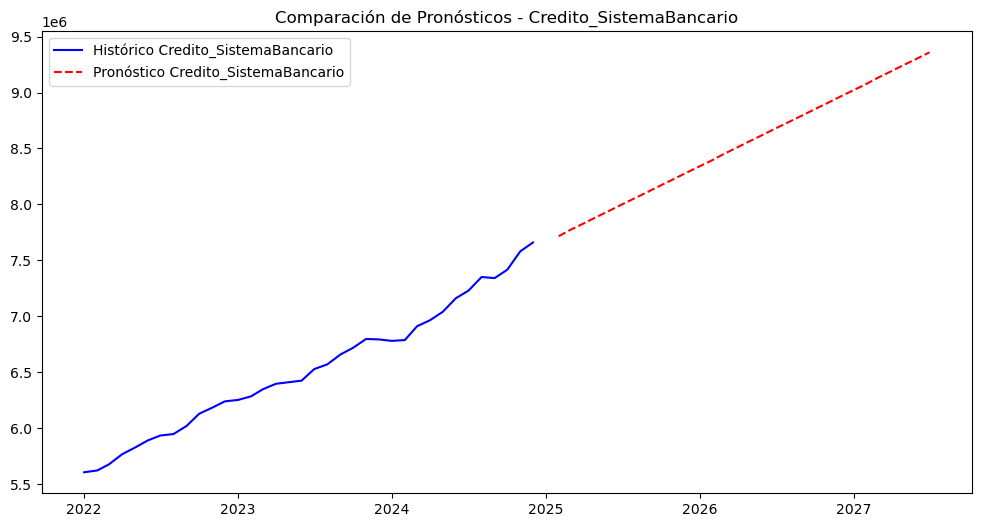

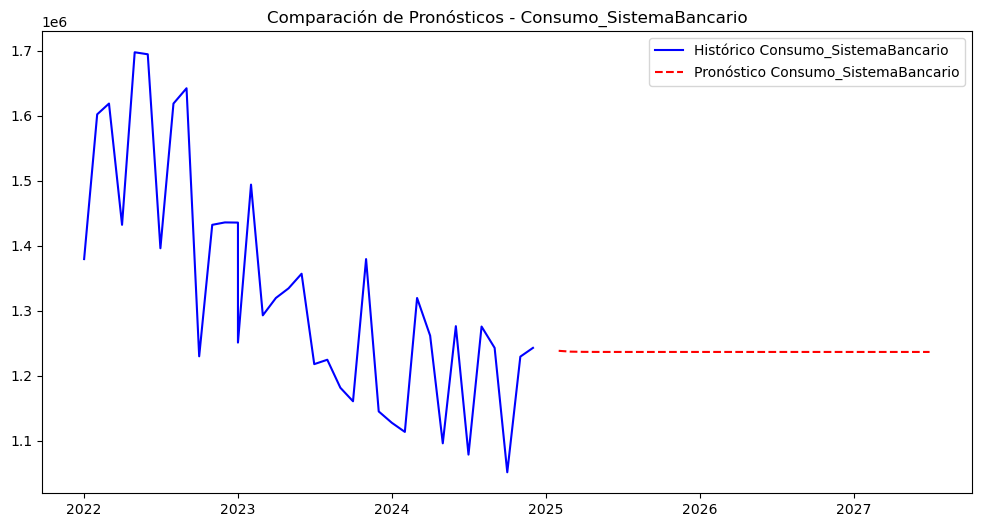

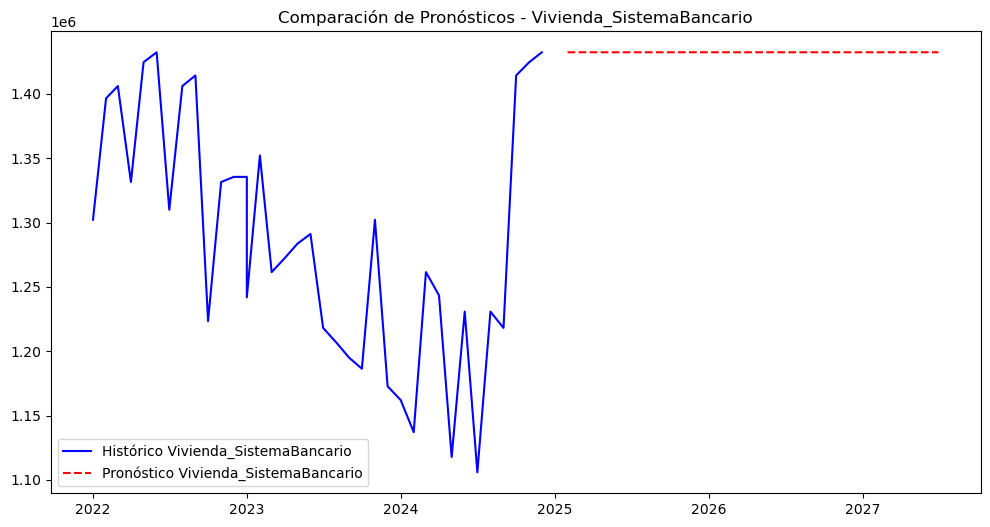

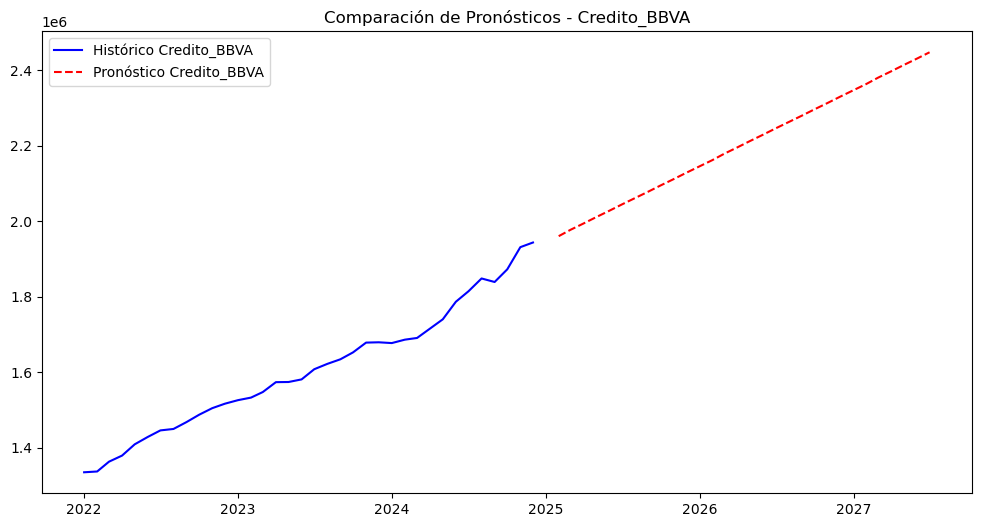

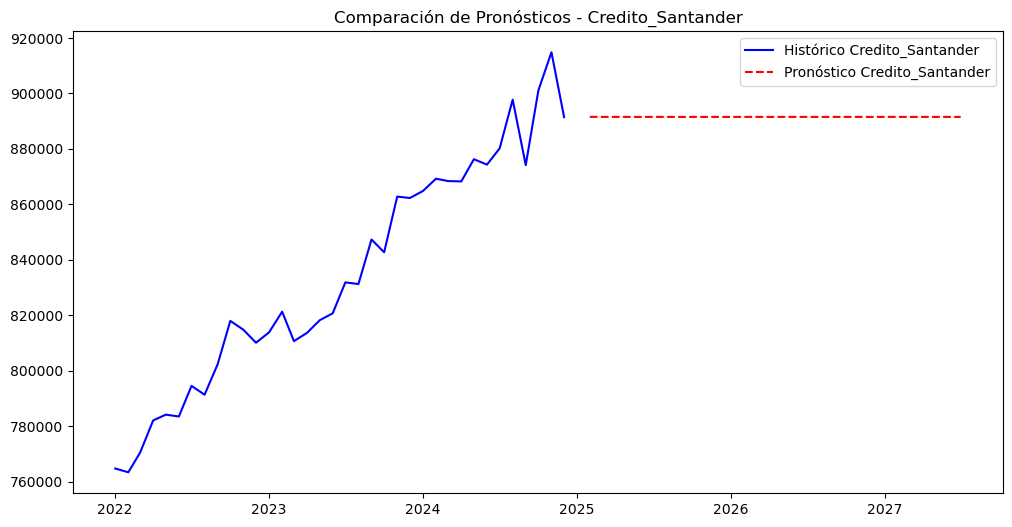

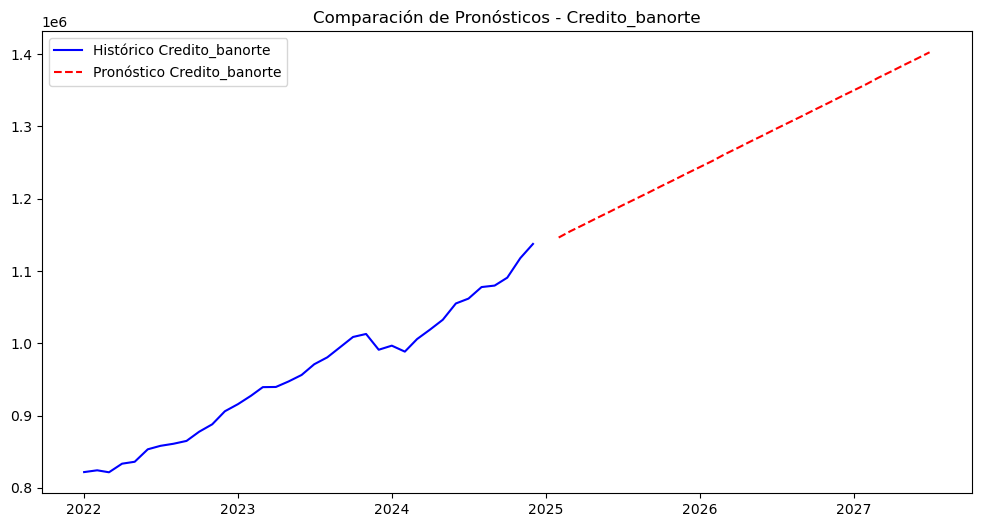

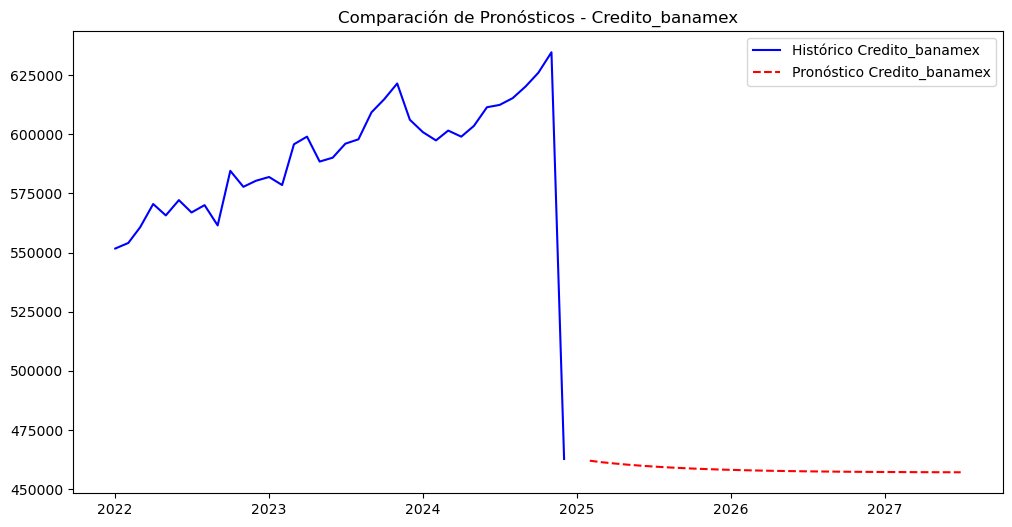

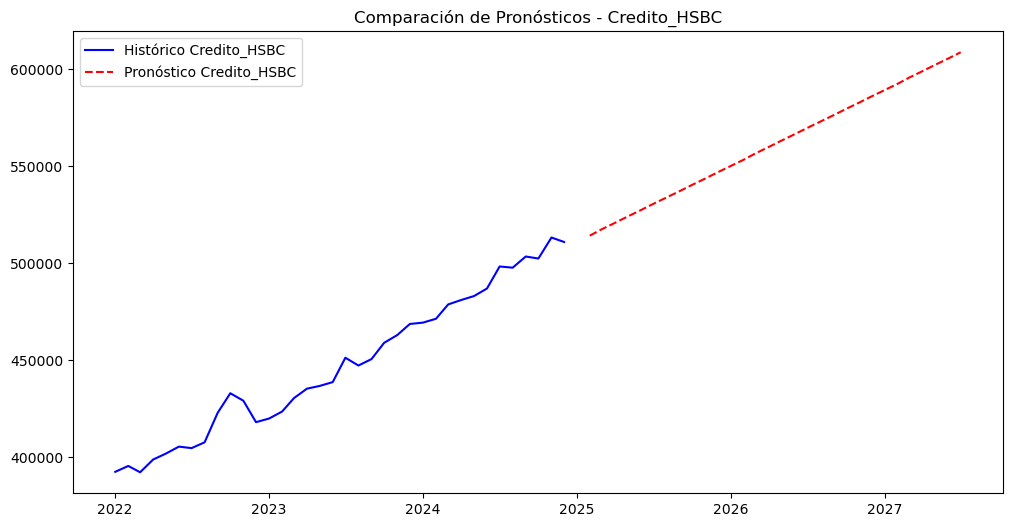

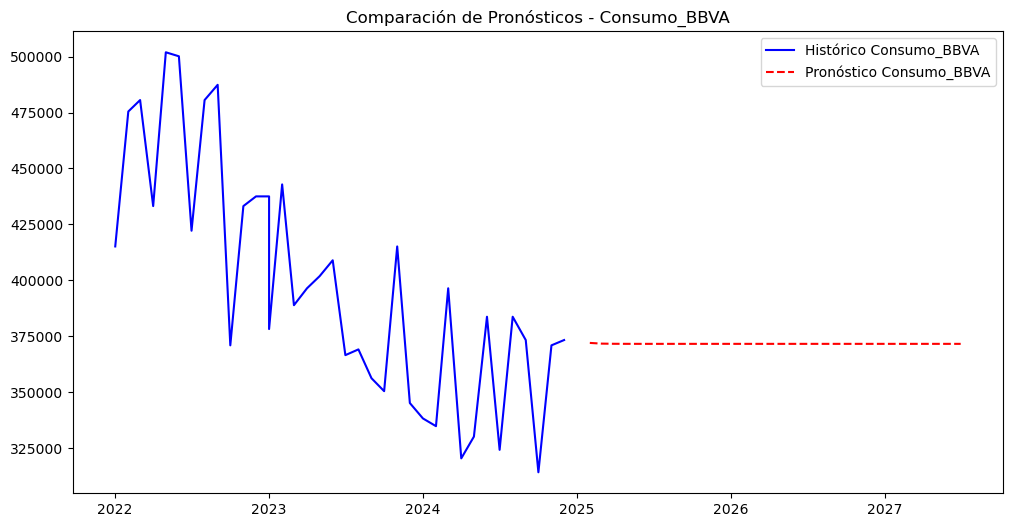

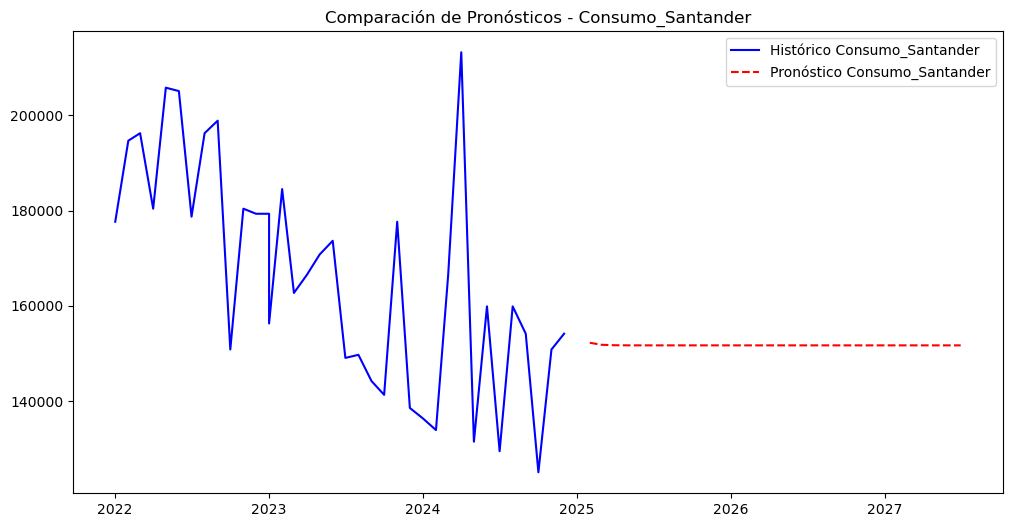

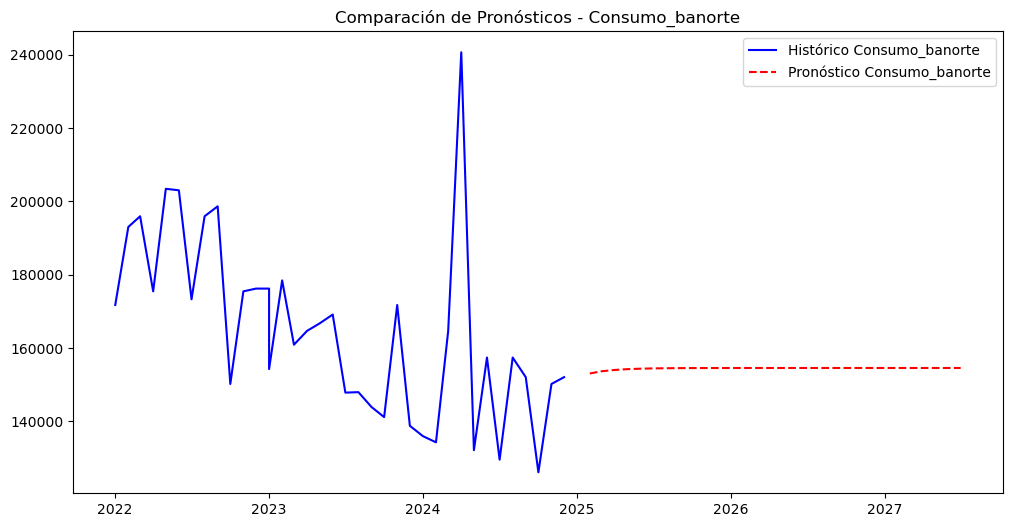

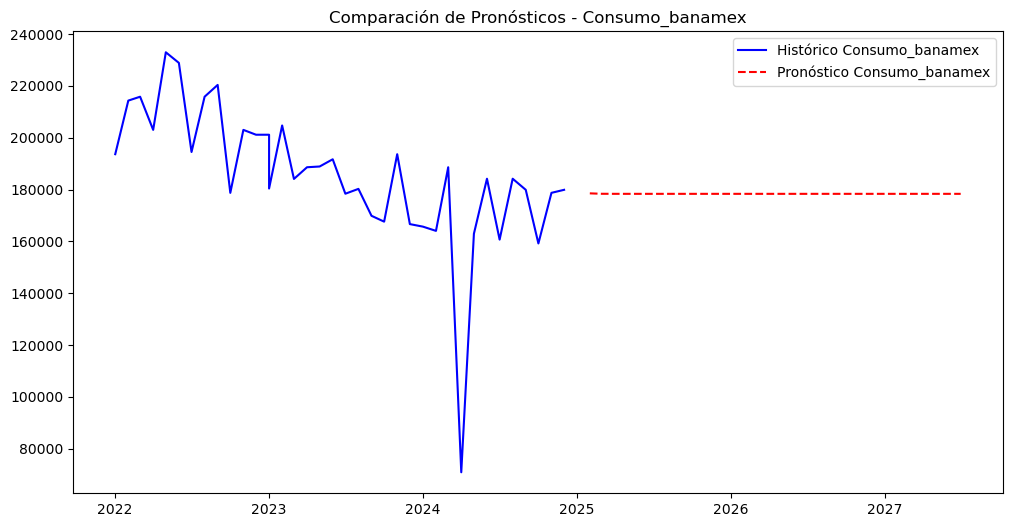

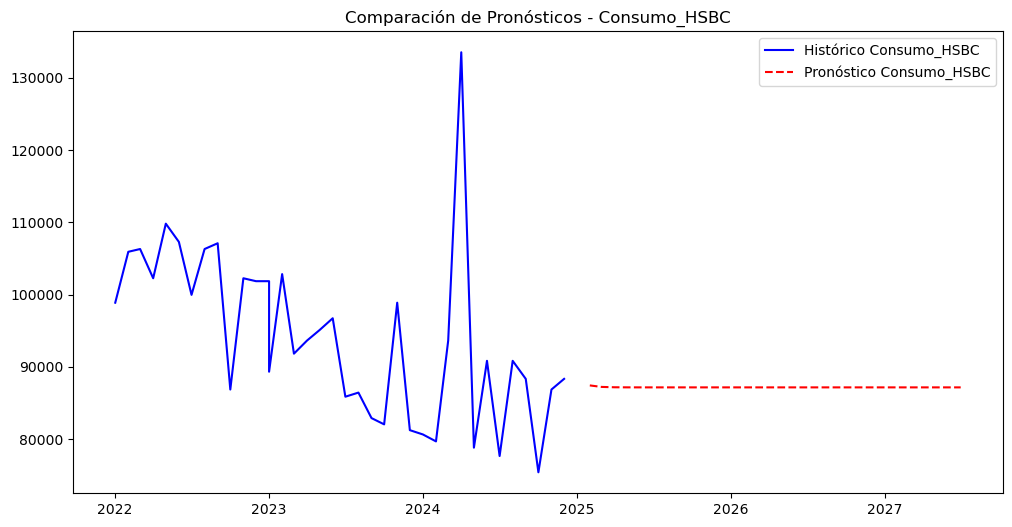

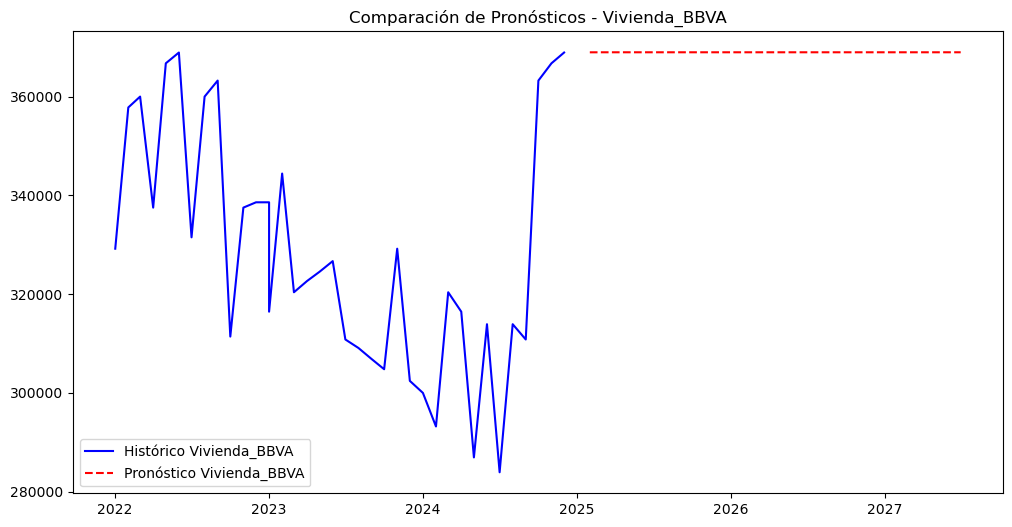

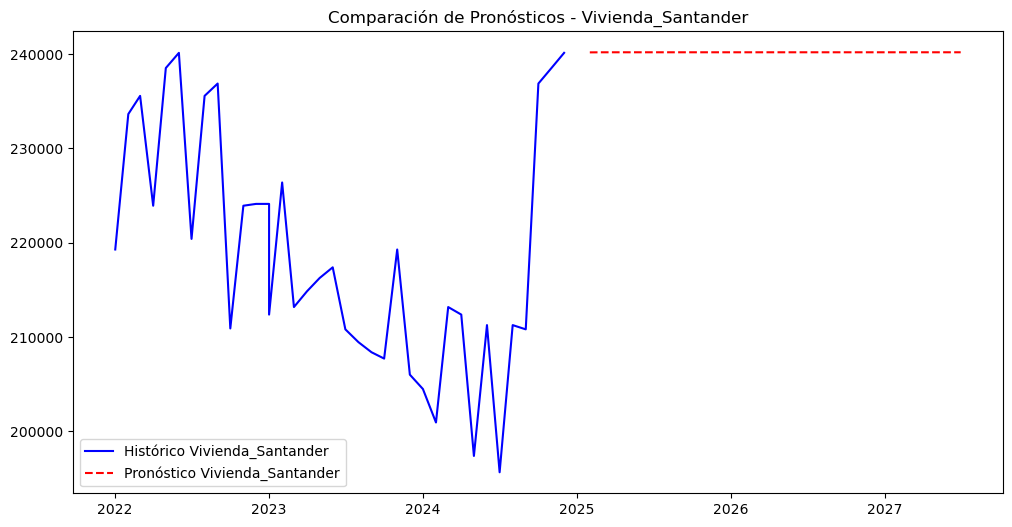

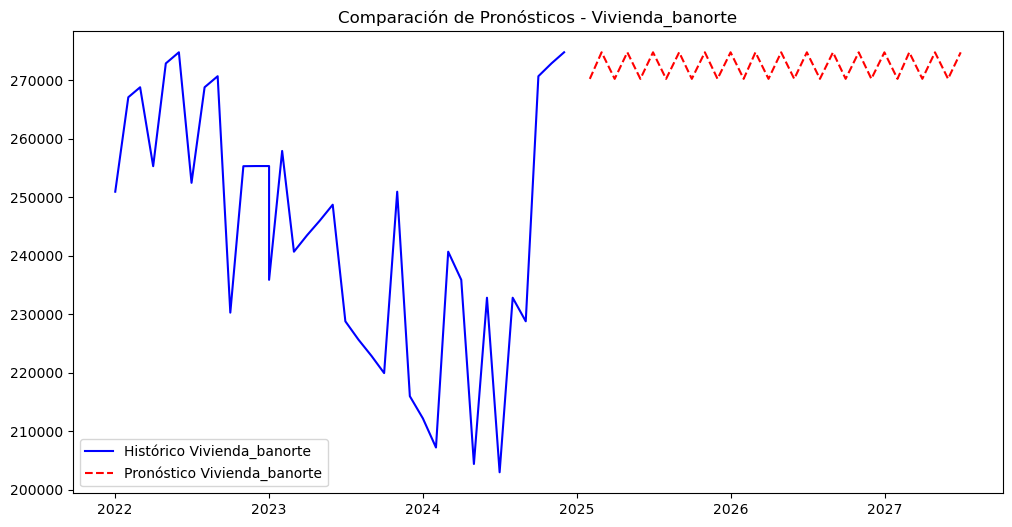

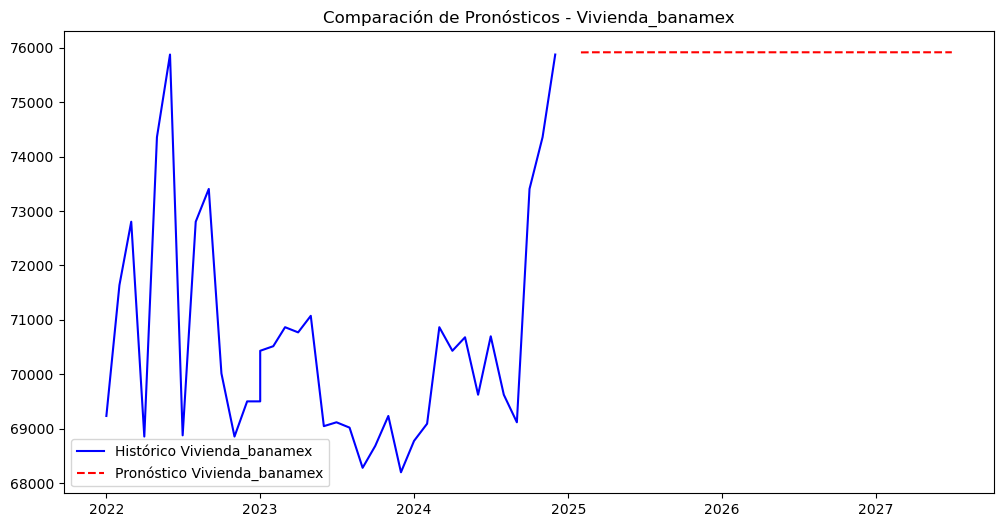

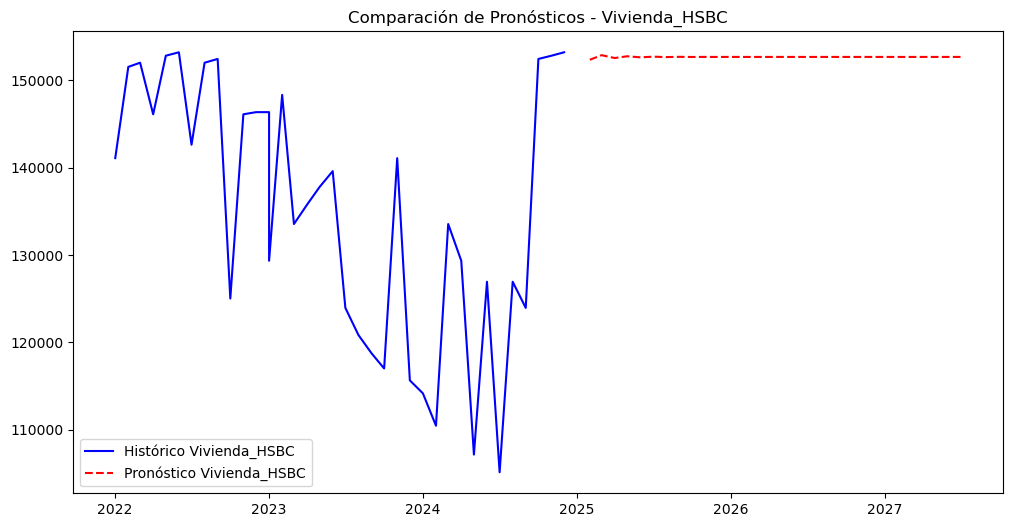

In [19]:
# Generar visualizaciones
for category in ["Credito_SistemaBancario", "Consumo_SistemaBancario", "Vivienda_SistemaBancario"] + credit_cols + consumo_cols + vivienda_cols:
    plt.figure(figsize=(12, 6))
    plt.plot(df["Fecha"], df[category], label=f"Histórico {category}", color='blue')
    plt.plot(fechas_futuras, df_forecasts[category], label=f"Pronóstico {category}", linestyle="dashed", color='red')
    plt.legend()
    plt.title(f"Comparación de Pronósticos - {category}")
    plt.show()
    

### **Pronóstico jerárquico**

La matriz 𝑆 refleja la jerarquía completa:

- SistemaBancario es la suma de todos los bancos.
- Cada banco es la suma de sus categorías de crédito (Crédito, Consumo y Vivienda).
- Cada categoría de un banco es un nivel independiente.
  

In [22]:
# Construcción de la matriz S
num_niveles = 3  # Crédito, Consumo, Vivienda
num_bancos = len(bancos)
num_series = num_niveles * num_bancos  # 15 columnas
num_filas = num_series + num_bancos + 1  # 21 filas
S = np.zeros((num_filas, num_series))

# Primera fila (Sistema Bancario total)
S[0, :] = 1

# Filas para bancos
for i in range(num_bancos):
    S[i + 1, i * num_niveles: (i + 1) * num_niveles] = 1

# Filas para cada categoría de cada banco
for i in range(num_bancos):
    for j in range(num_niveles):
        S[num_bancos + 1 + i * num_niveles + j, i * num_niveles + j] = 1


In [23]:
# Verificar dimensiones de la matriz
assert S.shape == (21, 15), f"Dimensión incorrecta: {S.shape}, se esperaba (21, 15)"


In [24]:
# Crear DataFrame para visualizar la matriz S
column_names = credit_cols + consumo_cols + vivienda_cols
row_names = ["SistemaBancario"] + bancos + [f"{tipo}_{banco}" for banco in bancos for tipo in ["Credito", "Consumo", "Vivienda"]]
S_df = pd.DataFrame(S, index=row_names, columns=column_names)
S_df


,Credito_BBVA,Credito_Santander,Credito_banorte,Credito_banamex,Credito_HSBC,Consumo_BBVA,Consumo_Santander,Consumo_banorte,Consumo_banamex,Consumo_HSBC,Vivienda_BBVA,Vivienda_Santander,Vivienda_banorte,Vivienda_banamex,Vivienda_HSBC
SistemaBancario,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
BBVA,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Santander,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
banorte,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
banamex,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
HSBC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
Credito_BBVA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Consumo_BBVA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vivienda_BBVA,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Credito_Santander,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


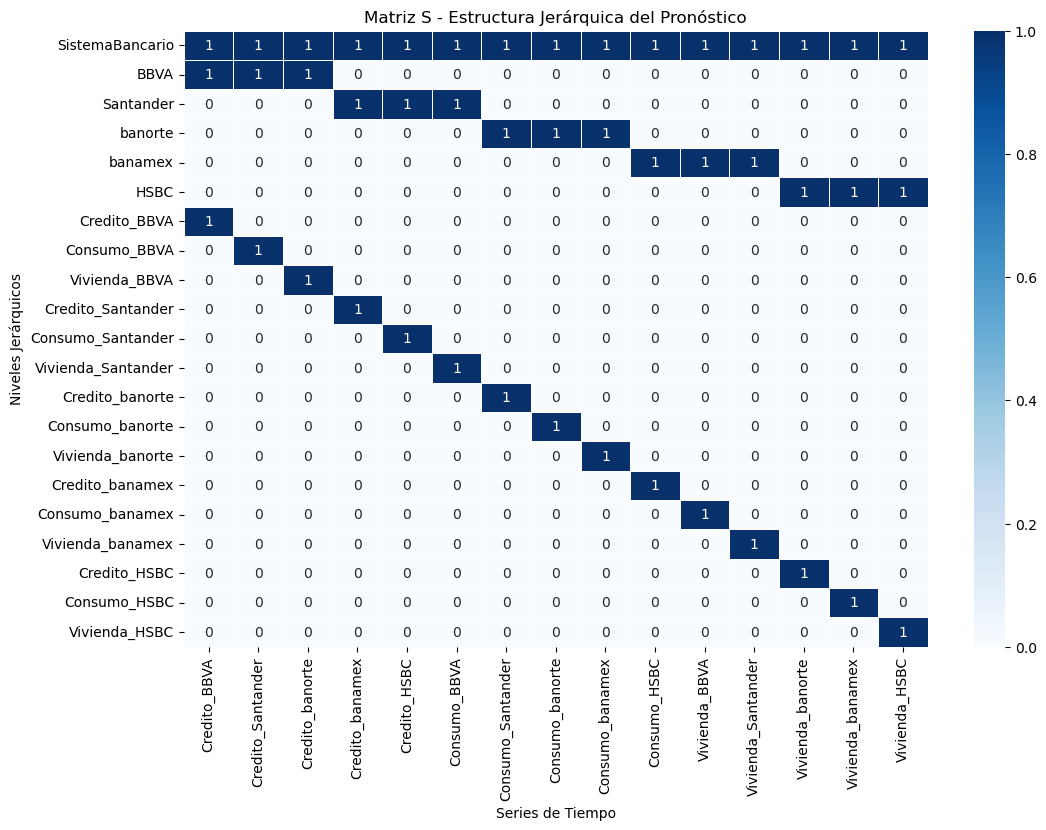

In [25]:
# Visualizar la matriz S
plt.figure(figsize=(12, 8))
sns.heatmap(S_df, annot=True, fmt=".0f", cmap="Blues", linewidths=0.5)
plt.title("Matriz S - Estructura Jerárquica del Pronóstico")
plt.xlabel("Series de Tiempo")
plt.ylabel("Niveles Jerárquicos")
plt.show()


In [26]:
# Calcular la matriz de reconciliación G
G = np.linalg.pinv(S.T @ S) @ S.T   # Usamos pinv para evitar problemas de invertibilidad


In [27]:
# Aplicar reconciliación a los pronósticos base
y_hat_base = df_forecasts[column_names].T.values  # (15x30)
y_hat_base = np.vstack([y_hat_base, np.zeros((6, y_hat_base.shape[1]))])  # Rellenar con ceros


In [28]:
# Verificar dimensiones
print(f"S shape: {S.shape}")  # Debe ser (21, 15)
print(f"G shape: {G.shape}")  # Debe ser (15, 21)
print(f"y_hat_base shape: {y_hat_base.shape}")  # Debe ser (15, 30)

S shape: (21, 15)
G shape: (15, 21)
y_hat_base shape: (21, 30)


In [29]:
# Aplicar la reconciliación
y_hat_reconciled = (S @ (G @ y_hat_base)).T   # (21x30)


In [30]:
# Convertir pronóstico reconciliado a DataFrame
df_forecast_hierarchical = pd.DataFrame(y_hat_reconciled, columns=row_names, index=fechas_futuras)
df_forecast_hierarchical.head()


,SistemaBancario,BBVA,Santander,banorte,banamex,HSBC,Credito_BBVA,Consumo_BBVA,Vivienda_BBVA,Credito_Santander,...,Vivienda_Santander,Credito_banorte,Consumo_banorte,Vivienda_banorte,Credito_banamex,Consumo_banamex,Vivienda_banamex,Credito_HSBC,Consumo_HSBC,Vivienda_HSBC
2025-01-31,2.170852e+06,631933.062480,876168.093715,313425.399129,228029.352473,121295.633266,201625.828610,202444.485635,227862.748236,147294.235506,...,300055.621118,208543.666473,14216.406858,90665.325797,76009.784158,76009.784158,76009.784158,40431.877755,40431.877755,40431.877755
2025-02-28,2.186154e+06,633066.585140,883895.930487,315366.397541,231622.131331,122202.829350,201575.838622,203419.588169,228071.158349,149726.016724,...,302704.693768,212046.550267,13172.464194,90147.383080,77207.377110,77207.377110,77207.377110,40734.276450,40734.276450,40734.276450
2025-03-31,2.201006e+06,634613.722087,891997.728785,315216.657107,235551.695457,123626.383123,201915.349424,204213.296375,228485.076287,152393.742677,...,305421.963097,209072.539540,14746.801062,91397.316504,78517.231819,78517.231819,78517.231819,41208.794374,41208.794374,41208.794374
2025-04-30,2.216383e+06,635750.149459,899714.407613,317130.403342,239087.254367,124700.651772,202209.192865,204743.419006,228797.537587,154958.444590,...,307997.998467,212675.787228,13802.477416,90652.138698,79695.751456,79695.751456,79695.751456,41566.883924,41566.883924,41566.883924
2025-05-31,2.231272e+06,637235.049382,907797.960758,317100.909138,242987.528553,126150.838724,202658.208875,205325.891495,229250.949011,157651.235735,...,310693.388375,209675.445046,15349.051929,92076.412163,80995.842851,80995.842851,80995.842851,42050.279575,42050.279575,42050.279575


## **Guardar resultados**

In [32]:
# Crear carpeta para guardar imágenes si no existe
output_folder = "resultados_forecasting"
os.makedirs(output_folder, exist_ok = True)

# Exportar participación de mercado
df_participacion.to_csv(os.path.join(output_folder, "Participacion_Mercado.csv"), index=False)

# Exportar pronóstico tradicional
df_final.to_csv(os.path.join(output_folder, "Pronostico_Tradicional.csv"), index=True)

# Exportar la matriz S a CSV
S_df.to_csv(os.path.join(output_folder, "Matriz_S.csv"))

# Exportar pronóstico jerárquico
df_forecast_hierarchical.to_csv(os.path.join(output_folder, "Pronostico_Jerarquico.csv"), index=True)

# Mensaje de confirmación
print("Proceso completado. Archivos generados en:", output_folder)
print("- Participacion_Mercado.csv")
print("- Pronostico_Tradicional.csv")
print("- Matriz_S.csv")
print("- Pronostico_Jerarquico.csv")



Proceso completado. Archivos generados en: resultados_forecasting
- Participacion_Mercado.csv
- Pronostico_Tradicional.csv
- Matriz_S.csv
- Pronostico_Jerarquico.csv
